<a href="https://colab.research.google.com/github/Shikha23K/ML-Algorithm_-Continue-/blob/main/insurancePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Steps**

1  dataset load
  head
 info
 dataframe

2 dataset division

3 correlation 

4 split dataset

5 model instantiate

6 fit data

7 evaluation



In [50]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [51]:
data=[line for line in open("/content/gdrive/My Drive/Colab Notebook/health insurance cost prediction/insurance.csv")]

In [52]:

df=pd.read_csv("/content/gdrive/My Drive/Colab Notebook/health insurance cost prediction/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Missing Values

In [53]:
for c in df.columns:
  flag=df[c].isnull().sum()
  if(flag>0):
    print(c)
  else:
    print("No missing value in : ",c)


No missing value in :  age
No missing value in :  sex
No missing value in :  bmi
No missing value in :  children
No missing value in :  smoker
No missing value in :  region
No missing value in :  charges


Duplicacy

In [54]:
d=df.duplicated().sum()
print("Duplicted data  : ",d)

Duplicted data  :  1


Managing duplicate data by droping it

In [55]:
df.drop_duplicates(inplace=True)

Data Analysis

In [56]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [57]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [58]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [59]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**Converting categorical data into numerical form**
**bold text**

In [60]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
dfNew = df.copy()
dfNew.replace(clean_data, inplace=True)

In [61]:
dfNew.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


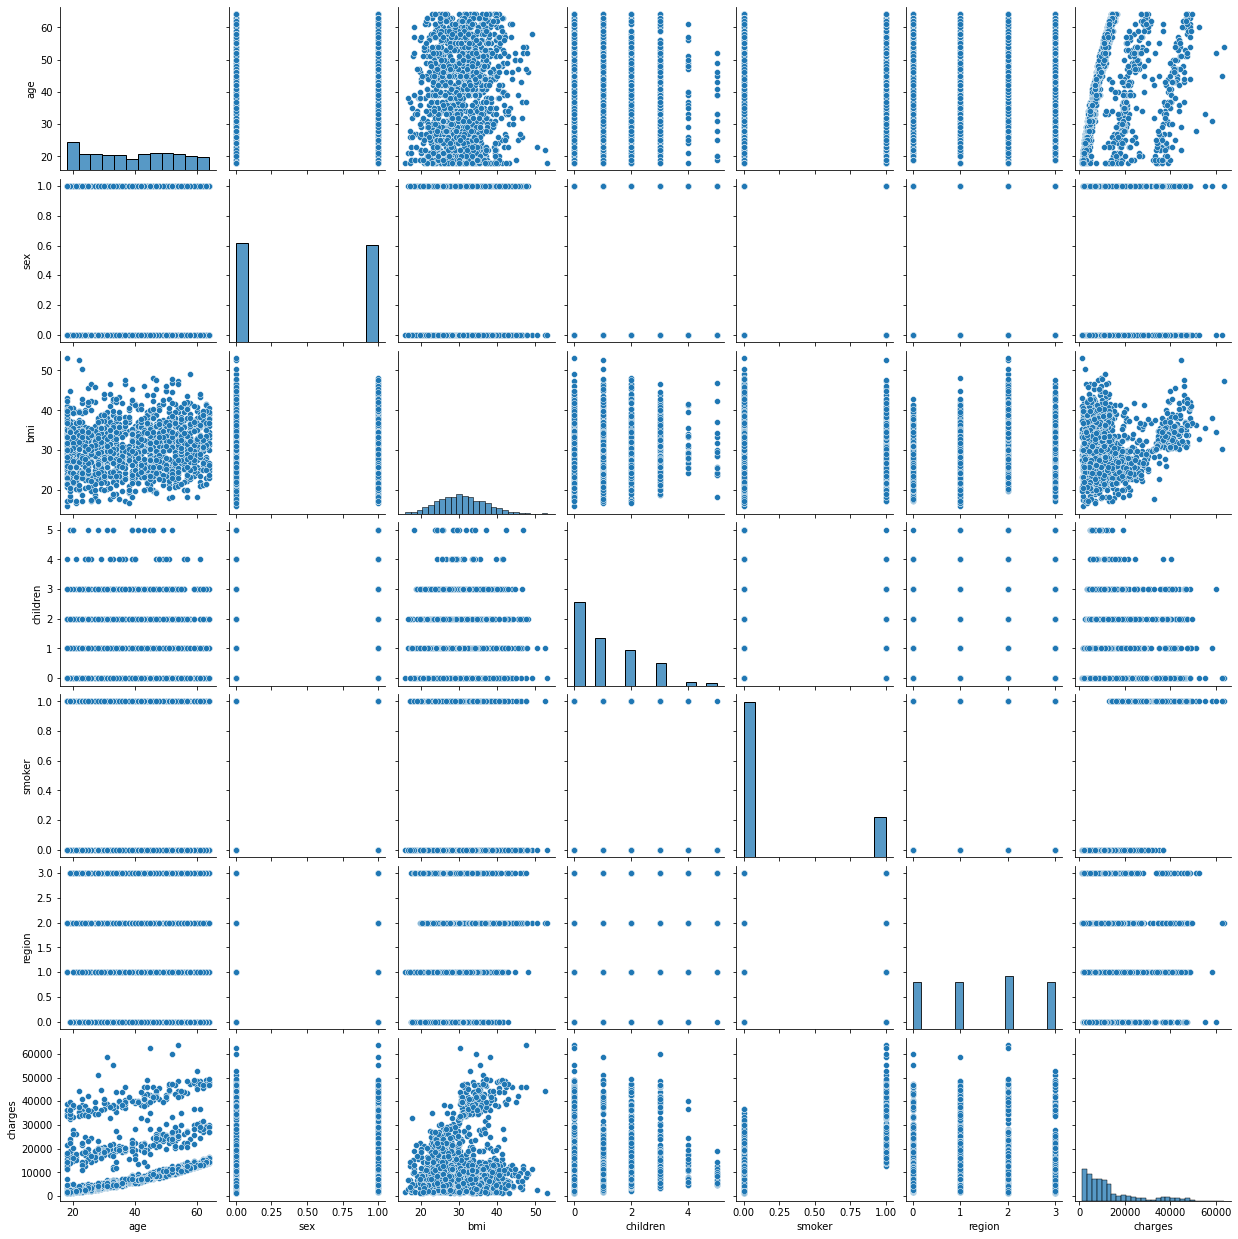

In [62]:
sns.pairplot(dfNew[['age','sex','bmi','children','smoker','region','charges']])

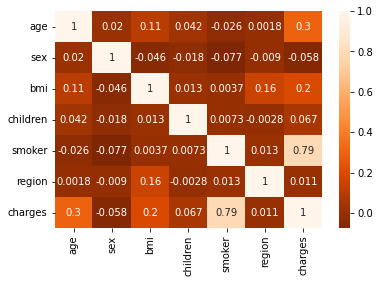

In [63]:
sns.heatmap(dfNew[['age','sex','bmi','children','smoker','region','charges']].corr(),cmap='Oranges_r',annot=True)

In [64]:
X=dfNew['smoker']
Y=dfNew['charges']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,test_size=0.33,random_state=39)

Linear Regression algorithm



In [67]:
from sklearn import linear_model

In [68]:
model=linear_model.LinearRegression()\


In [69]:
model.fit(XTrain[:,np.newaxis],YTrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


LinearRegression()

In [70]:
pred=model.predict(XTest[:,np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


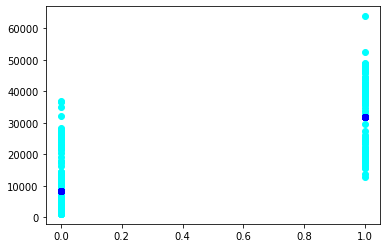

In [71]:
plt.scatter(XTest,YTest,color='Cyan')
plt.scatter(XTest,pred,color='Blue')
